In [25]:
pip install numpy pandas scikit-learn nltk textblob matplotlib


Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np
from textblob import TextBlob

# Example DataFrame
data = {
    'trailer_length': [120, 150, 90, 130, 140],  # in seconds
    'trailer_tone': ['positive', 'negative', 'neutral', 'positive', 'negative'],
    'trailer_text': [
        'An exciting adventure awaits!',
        'A dark and gloomy tale.',
        'A mix of drama and light-hearted moments.',
        'An exhilarating and fun experience.',
        'A tragic and somber story.'
    ],
    'box_office_revenue': [5000000, 2000000, 3000000, 6000000, 1500000]  # in USD
}

df = pd.DataFrame(data)
print("Data loaded successfully.")


Data loaded successfully.


In [27]:
# Convert tone to numerical values
df['trailer_tone'] = df['trailer_tone'].map({'positive': 1, 'neutral': 0, 'negative': -1})
print("Categorical feature 'trailer_tone' converted to numerical values.")


Categorical feature 'trailer_tone' converted to numerical values.


In [28]:
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Add sentiment score to DataFrame
df['sentiment_score'] = df['trailer_text'].apply(get_sentiment_score)
print("Sentiment scores computed and added to the DataFrame.")


Sentiment scores computed and added to the DataFrame.


In [29]:
# Define features and target
X = df[['trailer_length', 'trailer_tone', 'sentiment_score']]
y = df['box_office_revenue']
print("Features and target variable defined.")


Features and target variable defined.


In [30]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")


Data split into training and testing sets.


In [31]:
# Save the prepared data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Prepared data saved to CSV files.")


Prepared data saved to CSV files.


In [32]:
import pandas as pd

# Load prepared data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').squeeze()  # Convert DataFrame to Series
y_test = pd.read_csv('y_test.csv').squeeze()

print("Prepared data loaded successfully.")


Prepared data loaded successfully.


In [33]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [34]:
# Print shapes of y_test and y_pred to check if they are correct
print(f'Shape of y_test: {y_test.shape}')
print(f'Shape of y_pred: {y_pred.shape}')


Shape of y_test: ()
Shape of y_pred: (1,)


In [35]:
import numpy as np

# Ensure y_test and y_pred are numpy arrays
y_test = np.array(y_test).squeeze()  # Remove any extra dimensions
y_pred = np.array(y_pred).squeeze()  # Ensure it's a 1D array

# Check if both have the correct shape
print(f'Shape of y_test: {y_test.shape}')
print(f'Shape of y_pred: {y_pred.shape}')


Shape of y_test: ()
Shape of y_pred: ()


In [36]:
import numpy as np

# Convert both to numpy arrays (in case they aren't already)
y_test = np.array(y_test).squeeze()  # Squeeze to remove any extra dimensions
y_pred = np.array(y_pred).squeeze()  # Ensure it's 1D

# Check their shapes again
print(f"Shape of y_test after squeeze: {y_test.shape}")
print(f"Shape of y_pred after squeeze: {y_pred.shape}")


Shape of y_test after squeeze: ()
Shape of y_pred after squeeze: ()


In [37]:
import numpy as np

# Ensure y_test and y_pred are numpy arrays and not single values
y_test = np.array(y_test).reshape(-1)  # Force it to be a 1D array
y_pred = np.array(y_pred).reshape(-1)  # Force it to be a 1D array

print("y_test after reshape:", y_test)
print("y_pred after reshape:", y_pred)


y_test after reshape: [2000000]
y_pred after reshape: [4000000.]


In [38]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4000000000000.0


In [39]:
import joblib

# Save the trained model
joblib.dump(model, 'movie_success_model.pkl')

print("Model saved to 'movie_success_model.pkl'.")


Model saved to 'movie_success_model.pkl'.


In [43]:
# Assuming 'revenue' is your target variable
features = df.drop('box_office_revenue', axis=1)
target = df['box_office_revenue']


In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example DataFrame setup
df = pd.DataFrame({
    'trailer_length': [120, 150, 90],
    'trailer_tone': ['positive', 'neutral', 'negative'],
    'box_office': [2000000, 1500000, 1000000]  # Replace 'box_office' with your actual target column
})

# Print the columns to check the correct names
print(df.columns)

# Use the correct column names
features = df.drop('box_office', axis=1)  # Adjust 'box_office' if needed
target = df['box_office']  # Adjust 'box_office' if needed

# Define feature transformations
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, ['trailer_length']),
        ('cat', OneHotEncoder(), ['trailer_tone'])
    ])

X = preprocessor.fit_transform(features)

# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # For regression tasks
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, target, epochs=20, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X, target)
print(f"Mean Squared Error: {loss}")


Index(['trailer_length', 'trailer_tone', 'box_office'], dtype='object')


c:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3125000273920.0000 - val_loss: 1000000126976.0000
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 3125000273920.0000 - val_loss: 1000000126976.0000
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 3125000011776.0000 - val_loss: 1000000126976.0000
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 3125000011776.0000 - val_loss: 1000000126976.0000
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 3125000011776.0000 - val_loss: 1000000126976.0000
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 3125000011776.0000 - val_loss: 1000000126976.0000
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 3124999749632.0000 - val_loss: 999999995904.0000
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 3124999749632.0000 - val_loss: 999999995904.0000
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 3124999749632.0000 - val_loss: 999999995904.0000
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77

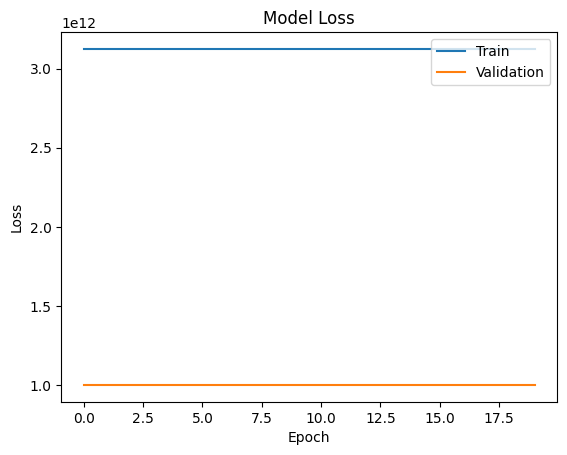

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2416665690112.0000
Test Mean Squared Error: 2416665690112.0


In [47]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Calculate Mean Squared Error on the test set
test_loss = model.evaluate(X, target)
print(f"Test Mean Squared Error: {test_loss}")


In [48]:
# Example new data for prediction
new_data = pd.DataFrame({
    'trailer_length': [130],
    'trailer_tone': ['positive']
})

# Preprocess new data
new_data_transformed = preprocessor.transform(new_data)

# Predict using the model
predictions = model.predict(new_data_transformed)
print(f"Predicted Box Office Revenue: {predictions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted Box Office Revenue: [[0.320015]]


In [51]:
from sklearn.model_selection import ParameterGrid
import tensorflow as tf

# Define a function to create and train the model
def train_model(epochs, batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X, target, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return history.history['loss'][-1]  # Return final loss

# Define parameter grid
param_grid = {
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64]
}

# Perform grid search manually
best_loss = float('inf')
best_params = None
for params in ParameterGrid(param_grid):
    loss = train_model(params['epochs'], params['batch_size'])
    if loss < best_loss:
        best_loss = loss
        best_params = params

print(f"Best Parameters: {best_params}")
print(f"Best Loss: {best_loss}")


c:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'batch_size': 32, 'epochs': 30}
Best Loss: 3124996079616.0
